Derivato da 
*Python Machine Learning 3rd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2019

Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

In [94]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns


In [55]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = plt.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.35, 0.95, 256)))

In [56]:
from sklearn import datasets

bc = datasets.load_breast_cancer()

X = bc.data
t = bc.target

print('Class labels:', np.unique(t))

Class labels: [0 1]


In [57]:
df_bc = pd.DataFrame(X, columns=bc.feature_names)
df_bc['class'] = t

df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [95]:
X.shape

(569, 30)

Splitting data into 70% training and 30% test data:

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=1, stratify=t)

In [59]:
print(f'Data set: {X.shape[0]} items, {X[t==0].shape[0]} in class 0 ({X[t==0].shape[0]/X.shape[0]*100:.2f}%), {X[t==1].shape[0]} in class 1 ({X[t==1].shape[0]/X.shape[0]*100:.2f}%)')
print(f'Training set: {X_train.shape[0]} items, {X_train[t_train==0].shape[0]} in class 0 ({X_train[t_train==0].shape[0]/X_train.shape[0]*100:.2f}%), {X_train[t_train==1].shape[0]} in class 1 ({X_train[t_train==1].shape[0]/X_train.shape[0]*100:.2f}%)')
print(f'Test set: {X_test.shape[0]} items, {X_test[t_test==0].shape[0]} in class 0 ({X_test[t_test==0].shape[0]/X_test.shape[0]*100:.2f}%), {X_test[t_test==1].shape[0]} in class 1 ({X_test[t_test==1].shape[0]/X_test.shape[0]*100:.2f}%)')

Data set: 569 items, 212 in class 0 (37.26%), 357 in class 1 (62.74%)
Training set: 398 items, 148 in class 0 (37.19%), 250 in class 1 (62.81%)
Test set: 171 items, 64 in class 0 (37.43%), 107 in class 1 (62.57%)


Standardizing the features:

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Modeling class probabilities via logistic regression

### Training a logistic regression model with scikit-learn

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e5)
lr = lr.fit(X_train_std, t_train)

In [62]:
y_train = lr.predict(X_train_std)
y_test = lr.predict(X_test_std)

p_train = lr.predict_proba(X_train_std)
p_test = lr.predict_proba(X_test_std)



In [63]:
p_test[:5]

array([[1.00000000e+000, 1.12655494e-307],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 9.38534272e-117]])

In [64]:
y_test[:5]

array([0, 1, 1, 0, 0])

In [65]:
from sklearn.metrics import accuracy_score

print(f'{(t_train != y_train).sum()} misclassified items in training set out of {t_train.shape[0]}, {accuracy_score(t_train, y_train):.3f} accuracy')

print(f'{(t_test != y_test).sum()} misclassified items in test set out of {t_test.shape[0]}, {accuracy_score(t_test, y_test):.3f} accuracy')

0 misclassified items in training set out of 398, 1.000 accuracy
8 misclassified items in test set out of 171, 0.953 accuracy


In [66]:
from sklearn.metrics import confusion_matrix

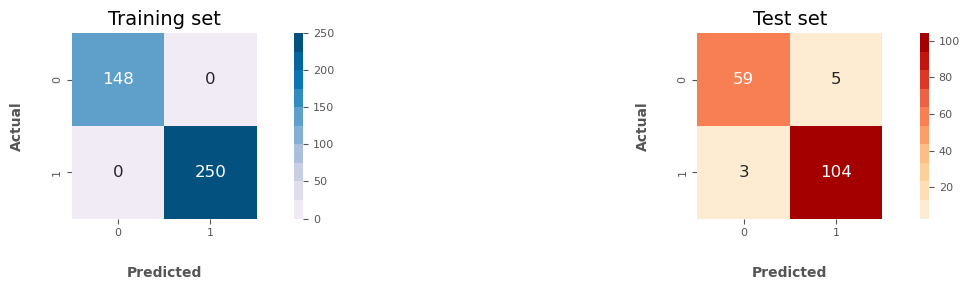

In [67]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
hm = sns.heatmap(confusion_matrix(t_train, y_train),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("PuBu", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(confusion_matrix(t_test, y_test),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

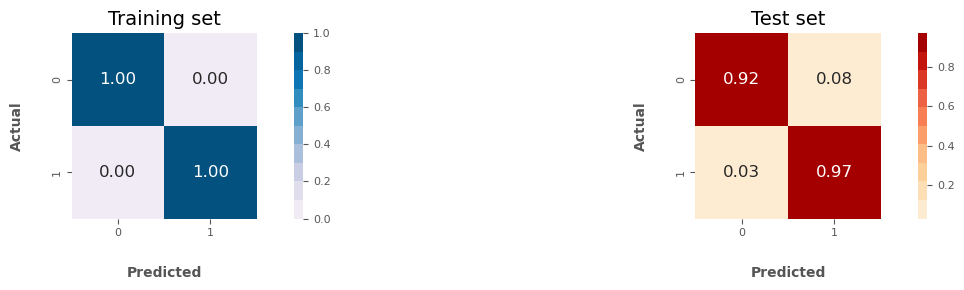

In [68]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
cm = confusion_matrix(t_train, y_train)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
hm = sns.heatmap(cmn,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 12},cmap = sns.color_palette("PuBu", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
cm = confusion_matrix(t_test, y_test)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
hm = sns.heatmap(cmn,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [69]:
from sklearn.metrics import classification_report

print('Training set')
print(classification_report(t_train, y_train))
print('Test set')
print(classification_report(t_test, y_test))

Training set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       250

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Test set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Accuracy: $$\frac{\text{\# elementi predetti correttamente}}{\text{\# elementi}}$$

Precision classe $i$: $$\frac{\text{\# elementi della classe $i$ predetti correttamente}}{\text{\# elementi predetti della classe $i$}}$$

Recall classe $i$: $$\frac{\text{\# elementi della classe $i$ predetti correttamente}}{\text{\# elementi della classe $i$}}$$

F-score classe $i$: $$\frac{\text{Precision classe $i$} \times \text{Recall classe $i$}}{\text{Precision classe $i$}+\text{Recall classe $i$}}$$

### Caso binario

|     |p=1 | p=0 | |
|---|---|---|---|
| t=1 | TP | FN | T |
| t=0 | FP | TN | F |
|     | P  | N  |   |


Accuracy: frazione di elementi classificati correttamente (valori alti migliori)
$$\frac{TP+TN}{TP+TN+FP+FN}$$

Precision: frazione di elementi effettivamente positivi tra quelli classificati positivi (valori alti migliori)
$$\frac{TP}{P}=\frac{TP}{TP+FP}$$

Recall (true positive rate): frazione degli elementi positivi classificati correttamente come positivi (valori alti migliori)
$$\frac{TP}{T}=\frac{TP}{TP+FN}$$

FPR (false positive rate): frazione degli elementi negativi classificati erroneamente come positivi (valori bassi migliori)
$$\frac{FP}{F}=\frac{FP}{TN+FP}$$



### Dataset limitato alle sole due prime features

In [70]:
X_train_reduced, X_test_reduced = X_train_std[:,0:2], X_test_std[:,0:2]

In [71]:
lr_reduced = LogisticRegression()
lr_reduced = lr_reduced.fit(X_train_reduced, t_train)

In [72]:
y_train_reduced = lr_reduced.predict(X_train_reduced)
y_test_reduced = lr_reduced.predict(X_test_reduced)
p_train_reduced = lr_reduced.predict_proba(X_train_reduced)
p_test_reduced = lr_reduced.predict_proba(X_test_reduced)

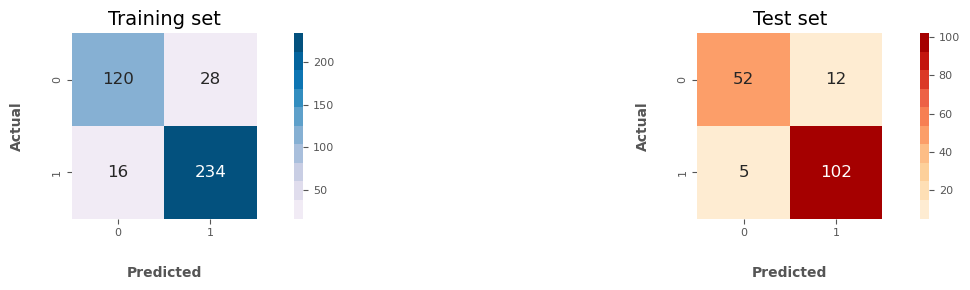

In [73]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
hm = sns.heatmap(confusion_matrix(t_train, y_train_reduced),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("PuBu", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(confusion_matrix(t_test, y_test_reduced),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [74]:
print('Training set first 2 features')
print(classification_report(t_train, y_train_reduced))
print('Test set first 2 features')
print(classification_report(t_test, y_test_reduced))

Training set first 2 features
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       148
           1       0.89      0.94      0.91       250

    accuracy                           0.89       398
   macro avg       0.89      0.87      0.88       398
weighted avg       0.89      0.89      0.89       398

Test set first 2 features
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        64
           1       0.89      0.95      0.92       107

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



In [75]:
lr.coef_, lr.intercept_

(array([[  23.09692312,   21.1897495 ,   13.08018422,  -21.28011826,
          -12.71601909,  122.66376324, -103.94156399, -105.94484716,
           27.07202902,    2.19475217, -157.61801877,   25.21584483,
          -12.73742011,  -73.12503643,   50.19149009,    7.39167296,
           96.07002903,  -88.89863289,  -30.59043617,  136.80717444,
          -12.00053185, -102.26852289,   19.97454753,  -59.15987858,
           40.26291523,   13.02915368, -106.96173795,  -21.60426605,
          -55.32193441,  -89.82108638]]),
 array([-2.57852703]))

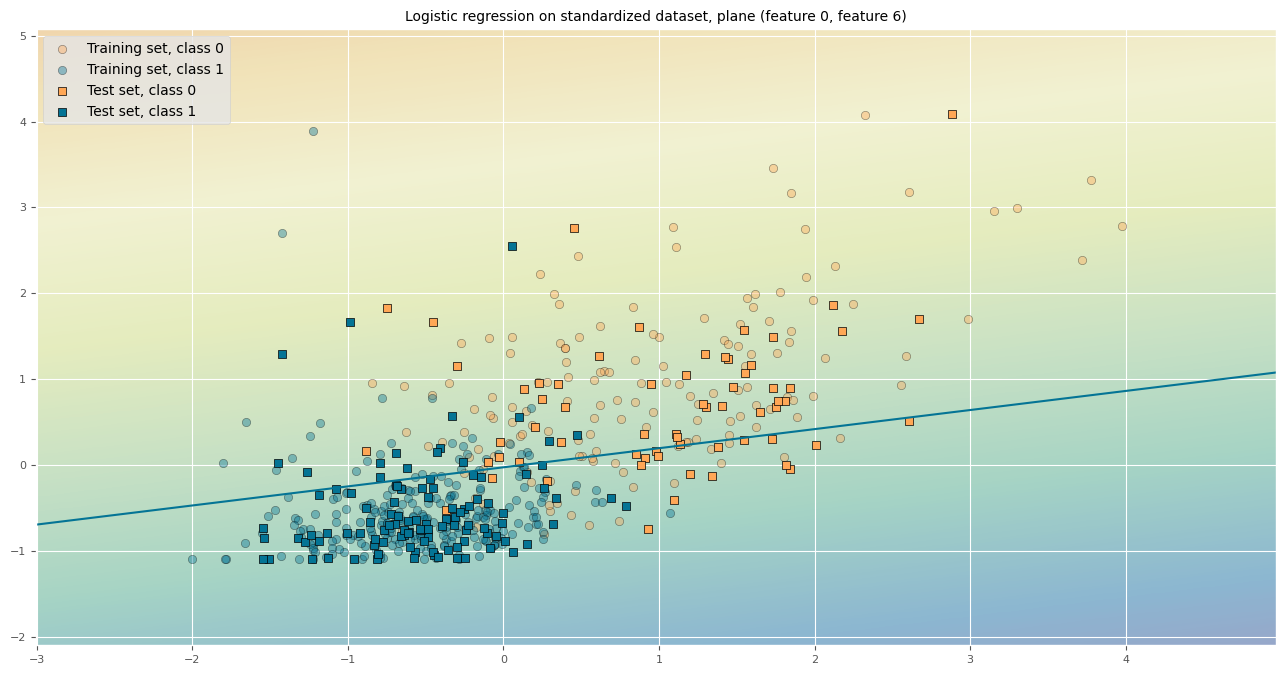

In [76]:
i,j = 0,6
fnc = lambda x1,x2: lr.coef_[0][i]*x1 + lr.coef_[0][j]*x2 + lr.intercept_[0]
fnc = np.vectorize(fnc)
resolution = 0.01
markers = ('s', 'o', 'x', 'v')
f, ax = plt.subplots(1, 1, sharex=True, figsize=(16,8))
x1_min, x1_max = np.minimum(X_train_std[:, i].min(), X_test_std[:, i].min()) - 1, np.maximum(X_train_std[:, i].max(), X_test_std[:, i].max()) + 1
x2_min, x2_max = np.minimum(X_train_std[:, j].min(), X_test_std[:, j].min()) - 1, np.maximum(X_train_std[:, j].max(), X_test_std[:, j].max()) + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
Z = fnc(xx1, xx2)
imshow_handle = plt.imshow(Z, origin='lower', aspect='auto', extent=(x1_min, x1_max, x2_min, x2_max), alpha=.5, cmap=cmap)
ax.contour(xx1, xx2, Z, [0], colors=[colors[1]], linewidths=[1.5])
for idx, cl in enumerate(np.unique(t_train)):
        plt.scatter(X_train_std[t_train == cl, i], X_train_std[t_train == cl, j], alpha=0.4, color=colors[idx], marker=markers[1], label=f'Training set, class {cl}', edgecolor='black')
for idx, cl in enumerate(np.unique(t_test)):
        plt.scatter(X_test_std[t_test == cl, i], X_test_std[t_test == cl, j], alpha=1, color=colors[idx], marker=markers[0], label=f'Test set, class {cl}', edgecolor='black')  
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_xlabel('')
ax.set_ylabel('')
plt.title(f"Logistic regression on standardized dataset, plane (feature {i}, feature {j})")
ax.legend(loc='upper left')
plt.show()

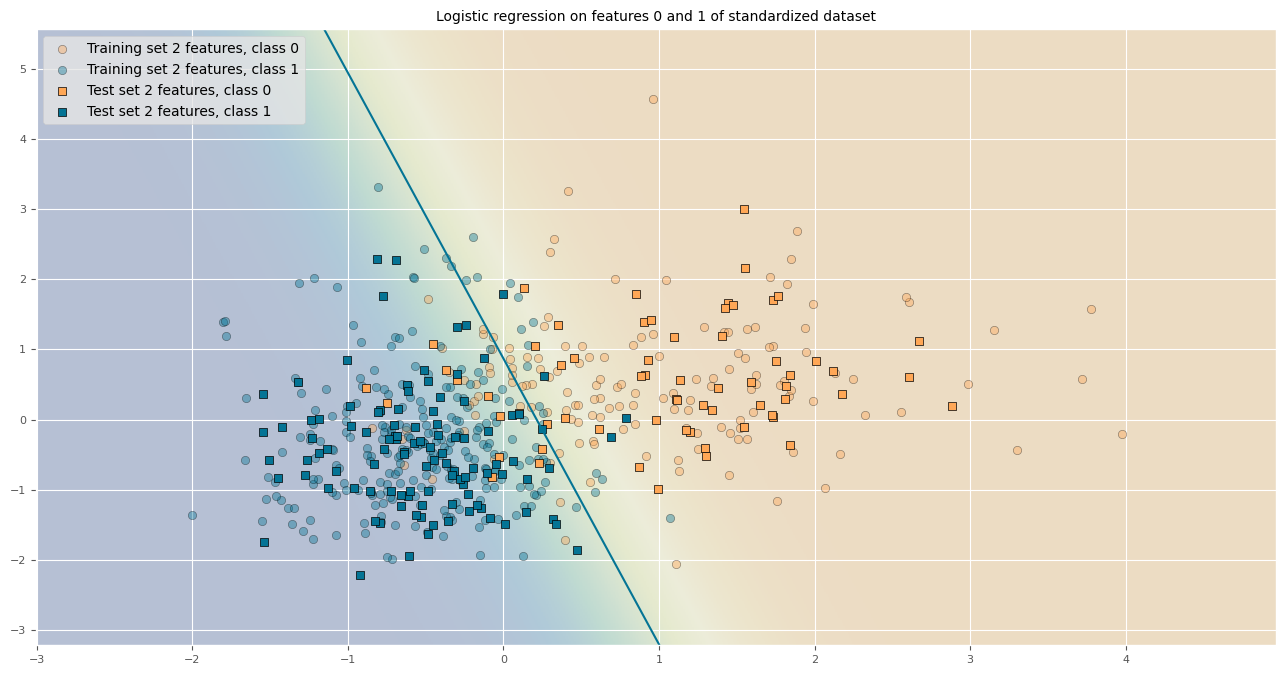

In [77]:
classifier = lr_reduced
resolution = 0.01
markers = ('s', 'o', 'x', 'v')
f, ax = plt.subplots(1, 1, sharex=True, figsize=(16,8))
x1_min, x1_max = np.minimum(X_train_reduced[:, 0].min(), X_test_reduced[:, 0].min()) - 1, np.maximum(X_train_reduced[:, 0].max(), X_test_reduced[:, 0].max()) + 1
x2_min, x2_max = np.minimum(X_train_reduced[:, 1].min(), X_test_reduced[:, 1].min()) - 1, np.maximum(X_train_reduced[:, 1].max(), X_test_reduced[:, 1].max()) + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
Z = classifier.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:,1]
Z = Z.reshape(xx1.shape)
imshow_handle = plt.imshow(Z, origin='lower', aspect='auto', extent=(x1_min, x1_max, x2_min, x2_max), alpha=.3, cmap=cmap)
ax.contour(xx1, xx2, Z, [0.5], colors=[colors[1]], linewidths=[1.5])
for idx, cl in enumerate(np.unique(t_train)):
        plt.scatter(X_train_reduced[t_train == cl, 0], X_train_reduced[t_train == cl, 1], alpha=0.4, color=colors[idx], marker=markers[1], label=f'Training set 2 features, class {cl}', edgecolor='black')
for idx, cl in enumerate(np.unique(t_test)):
        plt.scatter(X_test_reduced[t_test == cl, 0], X_test_reduced[t_test == cl, 1], alpha=1, color=colors[idx], marker=markers[0], label=f'Test set 2 features, class {cl}', edgecolor='black')  
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_xlabel('')
ax.set_ylabel('')
plt.title(f"Logistic regression on features {0} and {1} of standardized dataset")
ax.legend(loc='upper left')
plt.show()

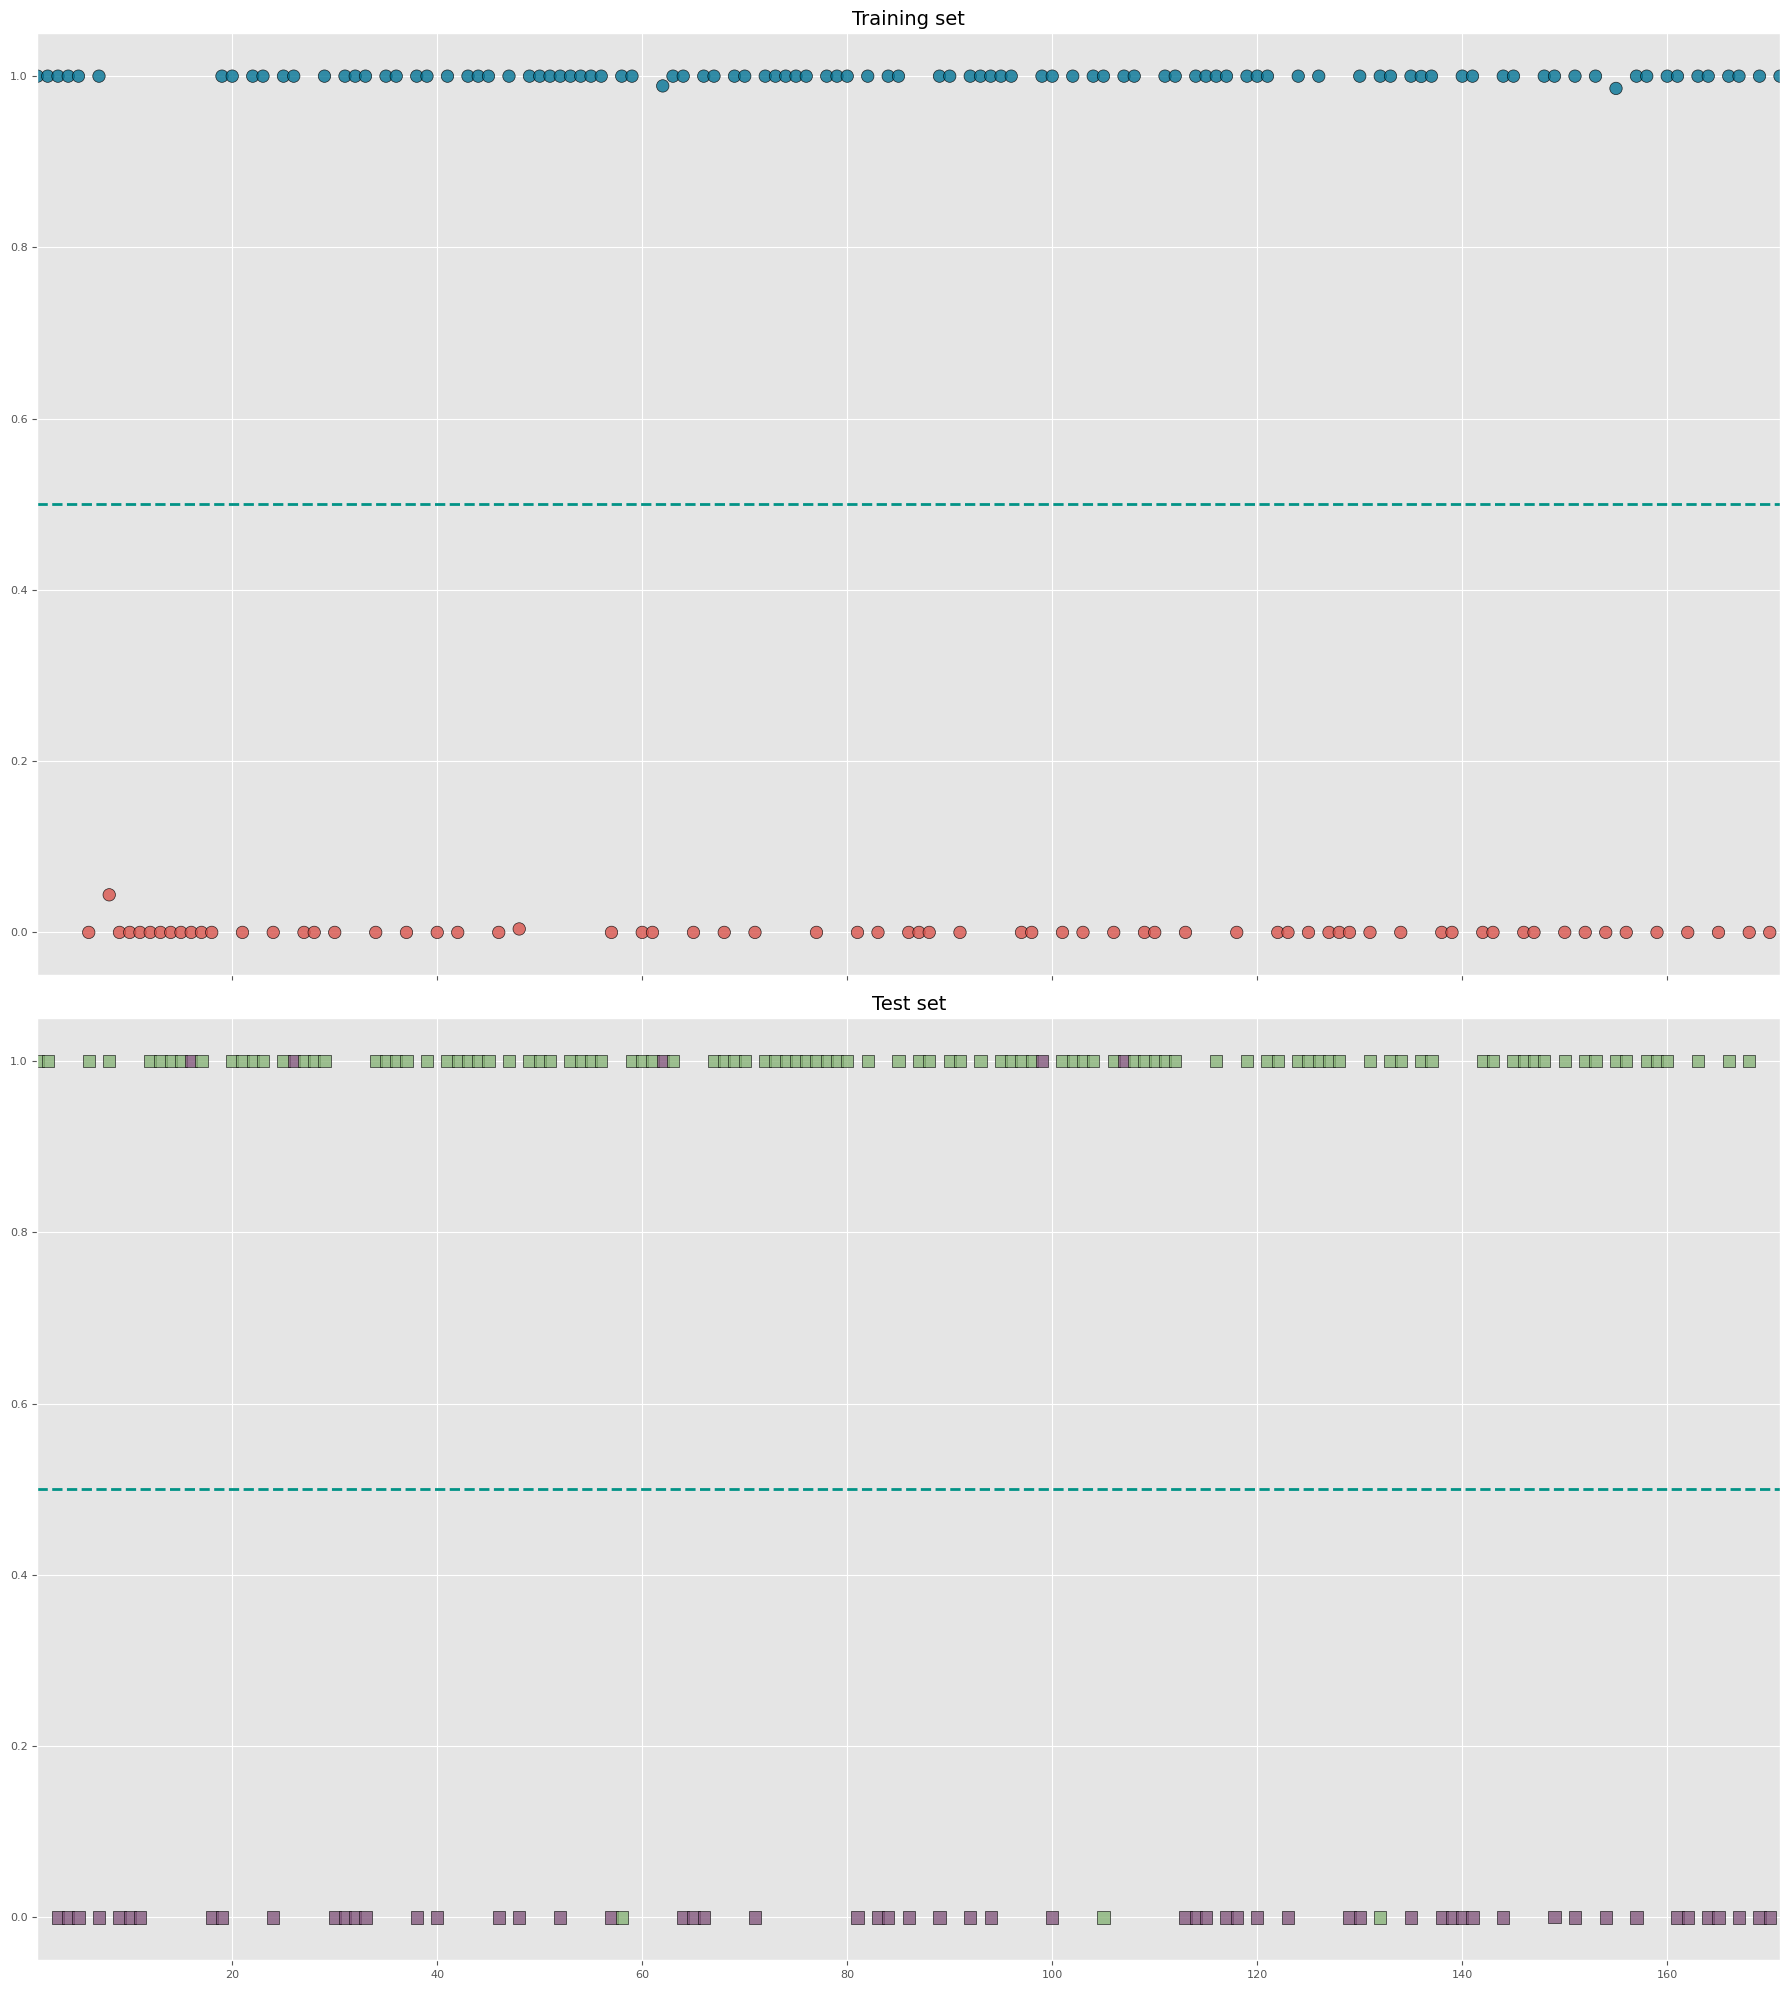

In [92]:
c_train = list(pd.Series(t_train).apply(lambda x: colors[1] if x==1 else colors[2]))
c_test = list(pd.Series(t_test).apply(lambda x: colors[3] if x==1 else colors[5]))
f, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(18,20))
ax1.scatter(range(p_train.shape[0]), p_train[:,1], color=c_train, s = 80, marker='o', edgecolor='black', alpha=.8)
ax1.axhline(y=.5, xmin=0, xmax=1, linewidth=2, linestyle='dashed', color=colors[6])
ax1.set_xlim(1,p_train.shape[0])
ax1.set_title('Training set', fontsize=14)
ax2.scatter(range(p_test.shape[0]), p_test[:,1], color=c_test, s = 80, marker='s', edgecolor='black', alpha=.8)
ax2.axhline(y=.5, xmin=0, xmax=1, linewidth=2, linestyle='dashed', color=colors[6])
ax2.set_xlim(1,p_test.shape[0])
ax2.set_title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

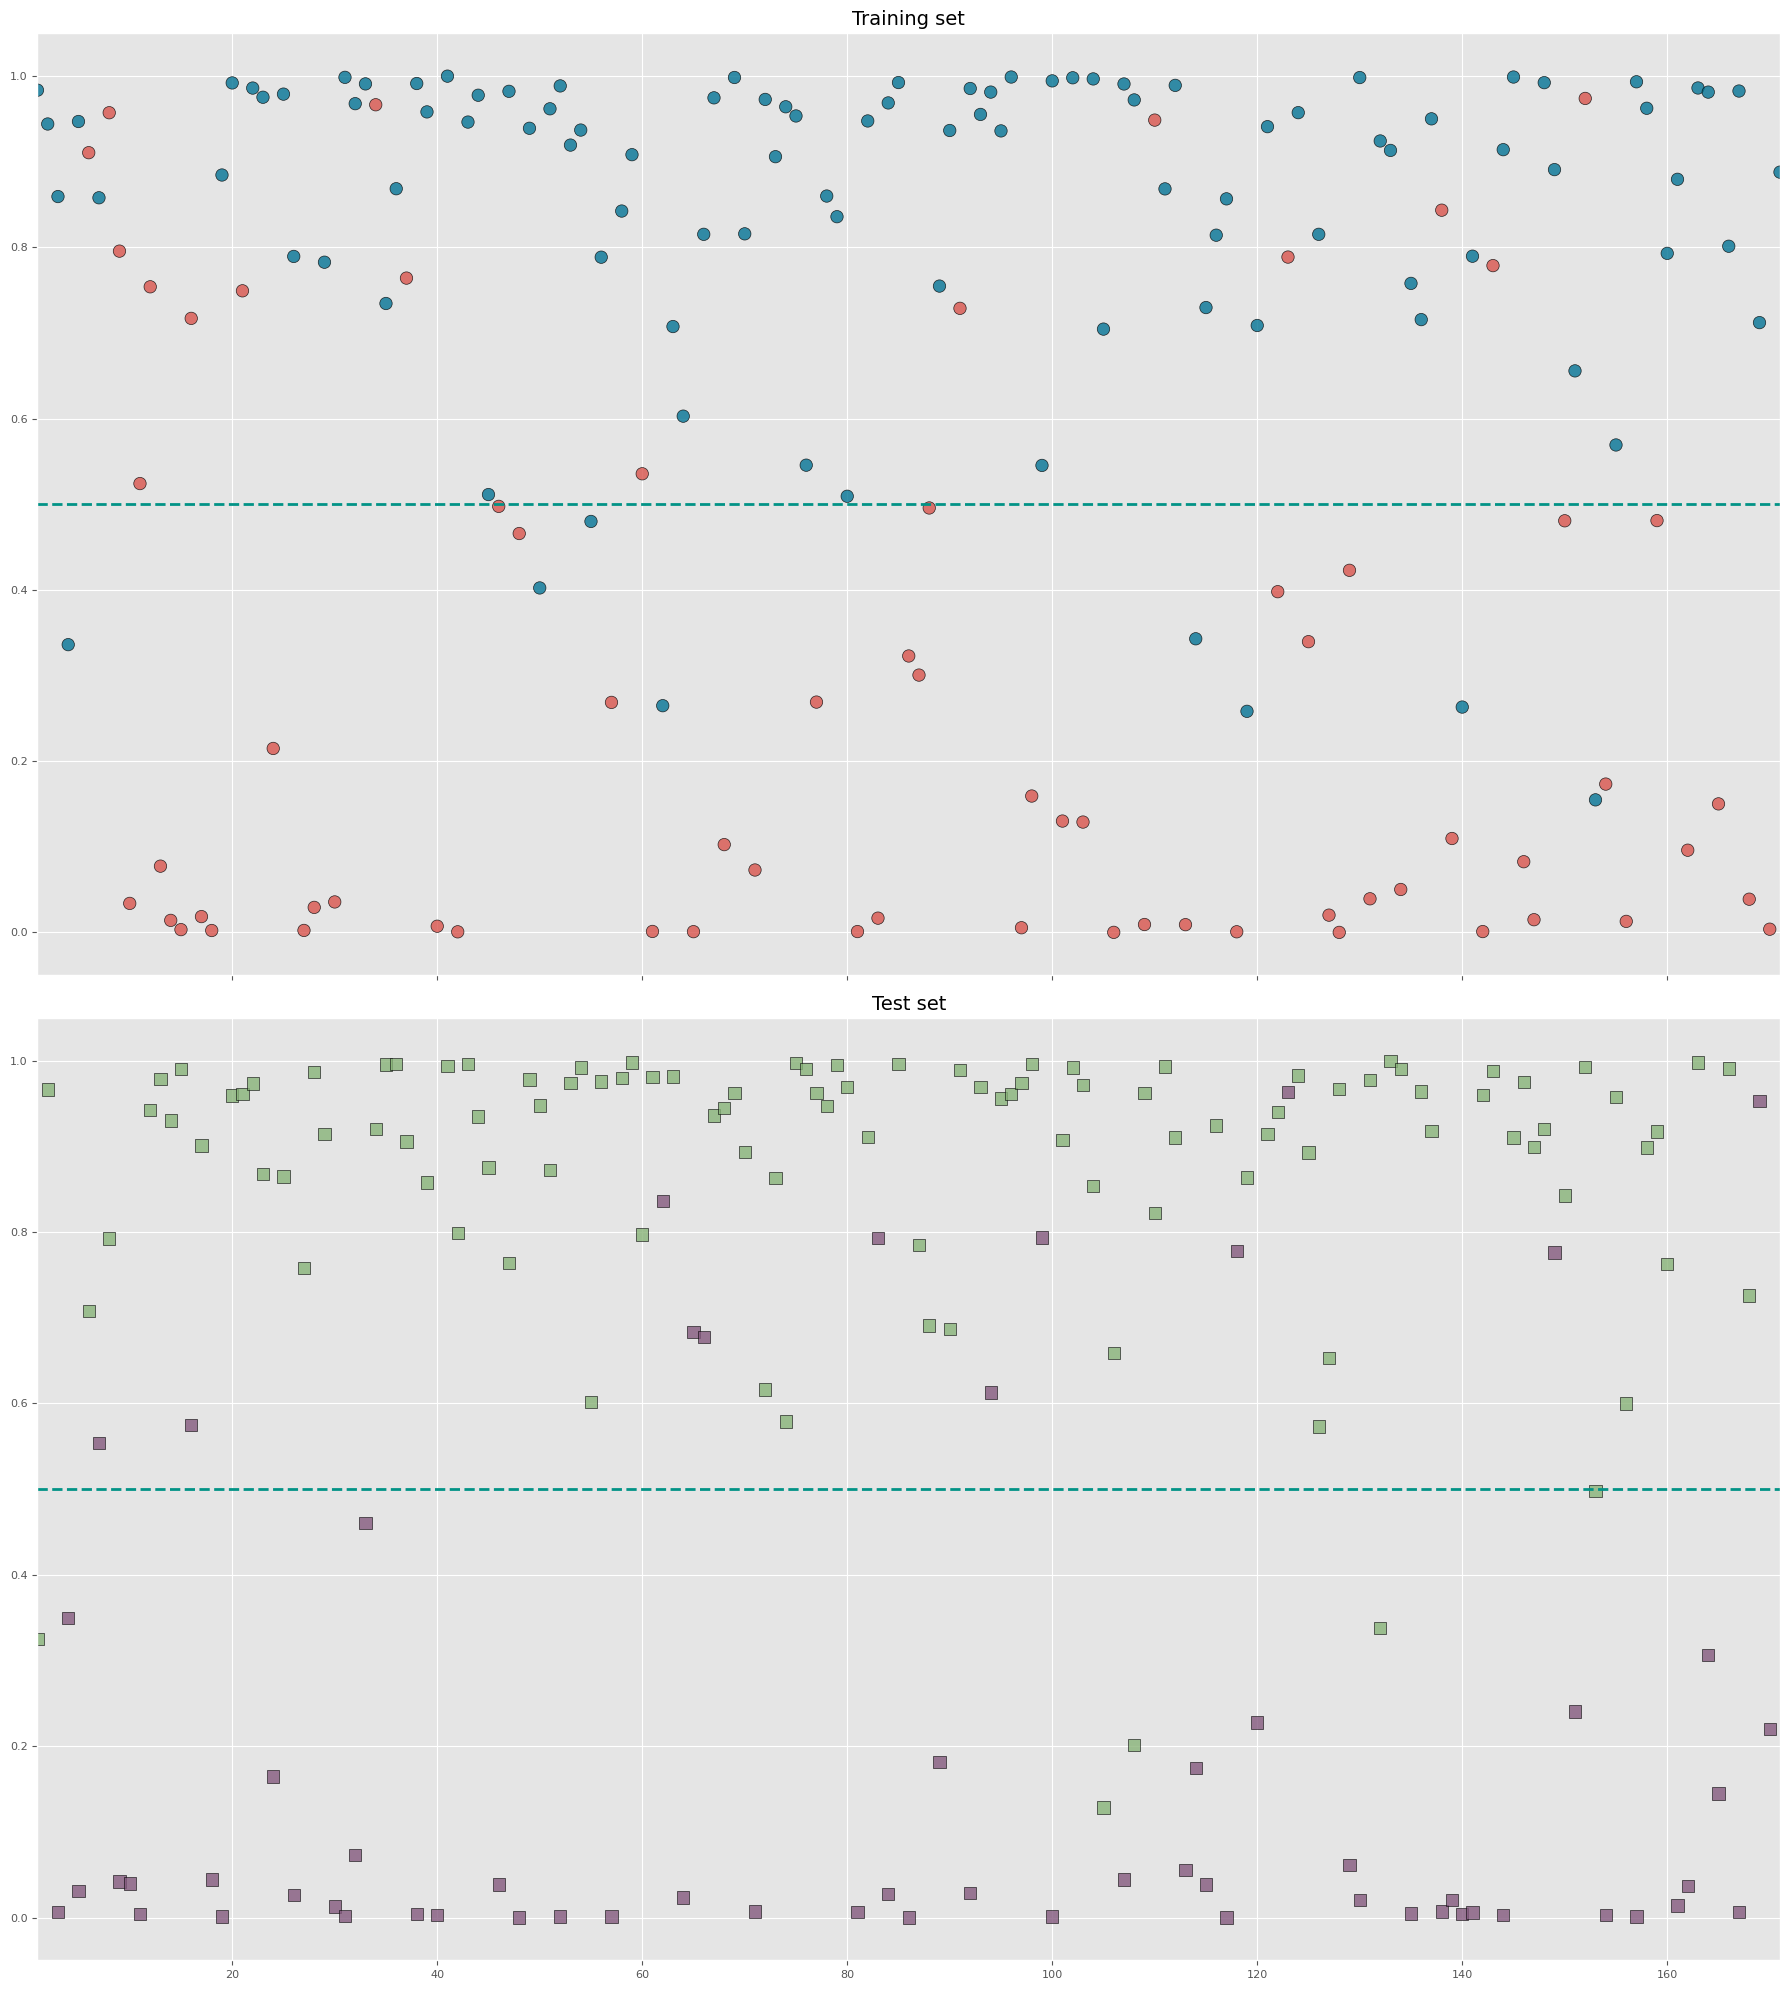

In [93]:
c_train_reduced = list(pd.Series(t_train).apply(lambda x: colors[1] if x==1 else colors[2]))
c_test_reduced = list(pd.Series(t_test).apply(lambda x: colors[3] if x==1 else colors[5]))
f, (ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(18,20))
ax1.scatter(range(p_train_reduced.shape[0]), p_train_reduced[:,1], color=c_train_reduced, s = 80, marker='o', edgecolor='black', alpha=.8)
ax1.axhline(y=.5, xmin=0, xmax=1, linewidth=2, linestyle='dashed', color=colors[6])
ax1.set_xlim(1,p_train_reduced.shape[0])
ax1.set_title('Training set', fontsize=14)
ax2.scatter(range(p_test_reduced.shape[0]), p_test_reduced[:,1], color=c_test_reduced, s = 80, marker='s', edgecolor='black', alpha=.8)
ax2.axhline(y=.5, xmin=0, xmax=1, linewidth=2, linestyle='dashed', color=colors[6])
ax2.set_xlim(1,p_test_reduced.shape[0])
ax2.set_title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

A ROC (Receiver Operating Characteristic) curve represents, for any value of the threshold applied to the probabilities for classification, the ratio $\frac{FP}{N}=\frac{FP}{TN+FP}$ of negative elements incorrectly classified as positive (*False positive rate*) and the ratio $\frac{TP}{P}=\frac{TP}{TP+FN}$ of positive elements correctly classified as positive (*True positive rate*).

The ideal point is (0,1): no negative elements misclassified, all positive elements well classified.

In [ ]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score, roc_auc_score, make_scorer, auc

In [271]:
distances = np.array(list(zip(np.sqrt((fpr - 0)**2 + (tpr - 1)**2), fpr, tpr, thresholds)))
distances

array([[1.000e+00, 0.000e+00, 0.000e+00,       inf],
       [9.960e-01, 0.000e+00, 4.000e-03, 1.000e+00],
       [3.200e-01, 0.000e+00, 6.800e-01, 9.899e-01],
       [3.201e-01, 6.757e-03, 6.800e-01, 9.896e-01],
       [6.436e-02, 6.757e-03, 9.360e-01, 8.833e-01],
       [6.541e-02, 1.351e-02, 9.360e-01, 8.583e-01],
       [1.570e-02, 1.351e-02, 9.920e-01, 6.333e-01],
       [2.179e-02, 2.027e-02, 9.920e-01, 6.270e-01],
       [2.027e-02, 2.027e-02, 1.000e+00, 5.251e-01],
       [1.000e+00, 1.000e+00, 1.000e+00, 3.224e-22]])

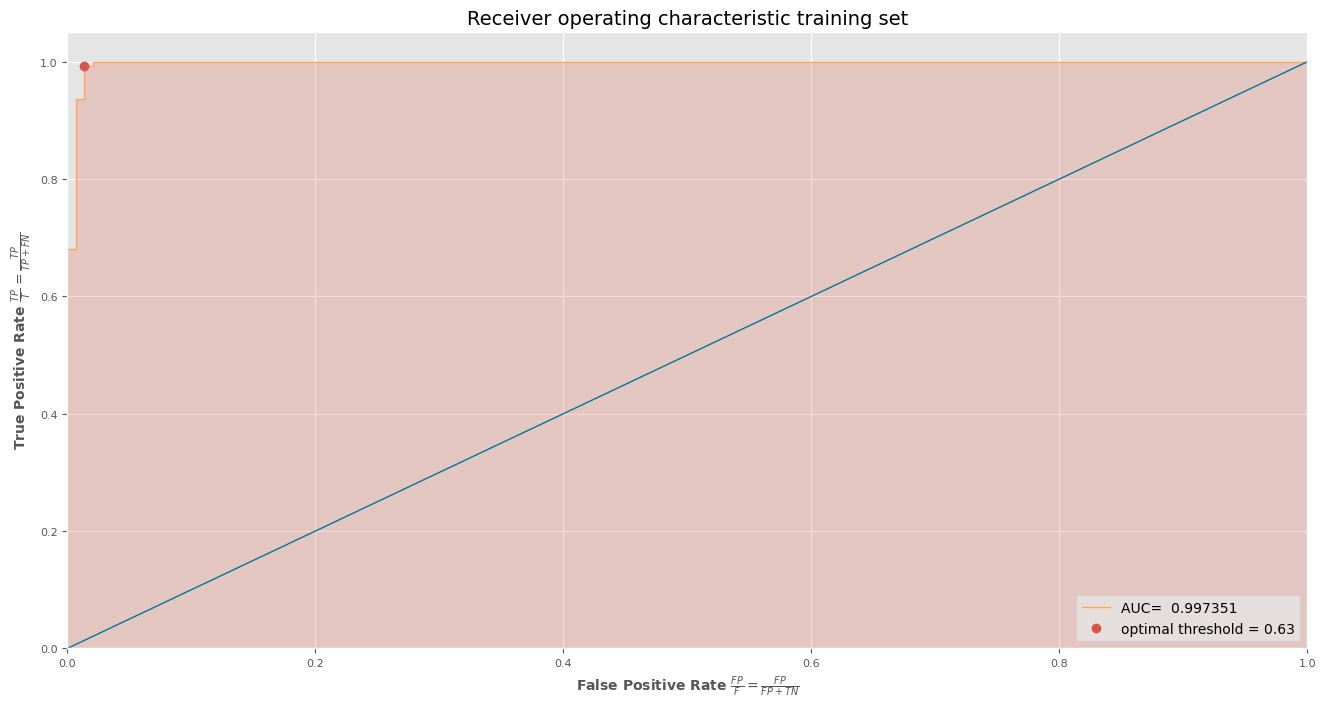

In [273]:
fpr, tpr, thresholds = roc_curve(t_train, p_train[:,1], pos_label=1)
distances = np.array(list(zip(np.sqrt((fpr - 0)**2 + (tpr - 1)**2), fpr, tpr, thresholds)))
distances = distances[distances[:,0].argsort()]
optimal_threshold_tr = distances[0,3]
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, color=colors[0], linewidth=1,label=f'AUC= {auc(fpr, tpr): 0.6f}')
plt.fill_between(fpr, 0, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color=colors[1], linewidth=1)
plt.plot(distances[0,1], distances[0,2], 'o', color=colors[2], label=f'optimal threshold = {optimal_threshold_tr:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'True Positive Rate $\frac{TP}{T}=\frac{TP}{TP+FN}$')
plt.xlabel(r'False Positive Rate $\frac{FP}{F}=\frac{FP}{FP+TN}$')
plt.title('Receiver operating characteristic training set', fontsize=14)
plt.legend(loc="lower right")
plt.show()

The Area under curve (AUC) provides a measure of the quality of the classifier. More precisely, it corresponds to the probability that a classifier ranks a random positive item higher than a random negative one (that is assigns it a higher probability of being positive).

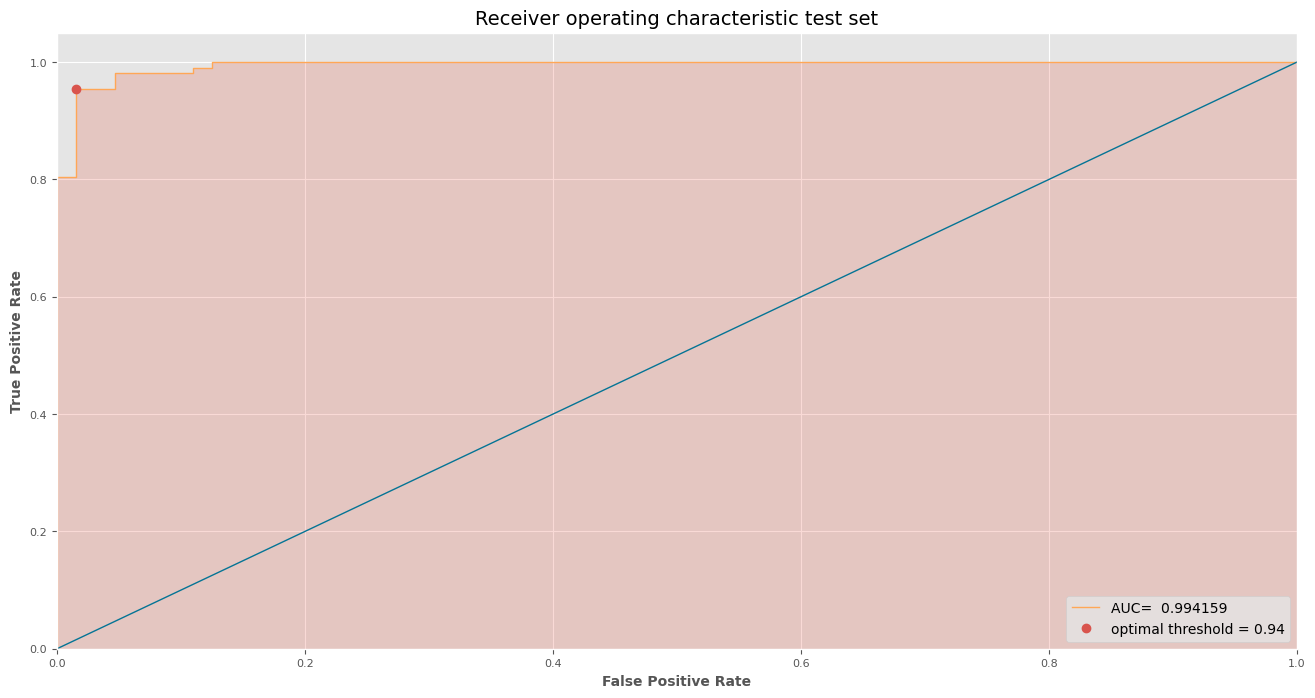

In [274]:
fpr, tpr, thresholds = roc_curve(t_test, p_test[:,1], pos_label=1)
distances = np.array(list(zip(np.sqrt((fpr - 0)**2 + (tpr - 1)**2), fpr, tpr, thresholds)))
distances = distances[distances[:,0].argsort()]
optimal_threshold_ts = distances[0,3]
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, color=colors[0], linewidth=1,label=f'AUC= {auc(fpr, tpr): 0.6f}')
plt.fill_between(fpr, 0, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color=colors[1], linewidth=1)
plt.plot(distances[0,1], distances[0,2], 'o', color=colors[2], label=f'optimal threshold = {optimal_threshold_ts:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'True Positive Rate')
plt.xlabel(r'False Positive Rate')
plt.title('Receiver operating characteristic test set', fontsize=14)
plt.legend(loc="lower right")
plt.show()

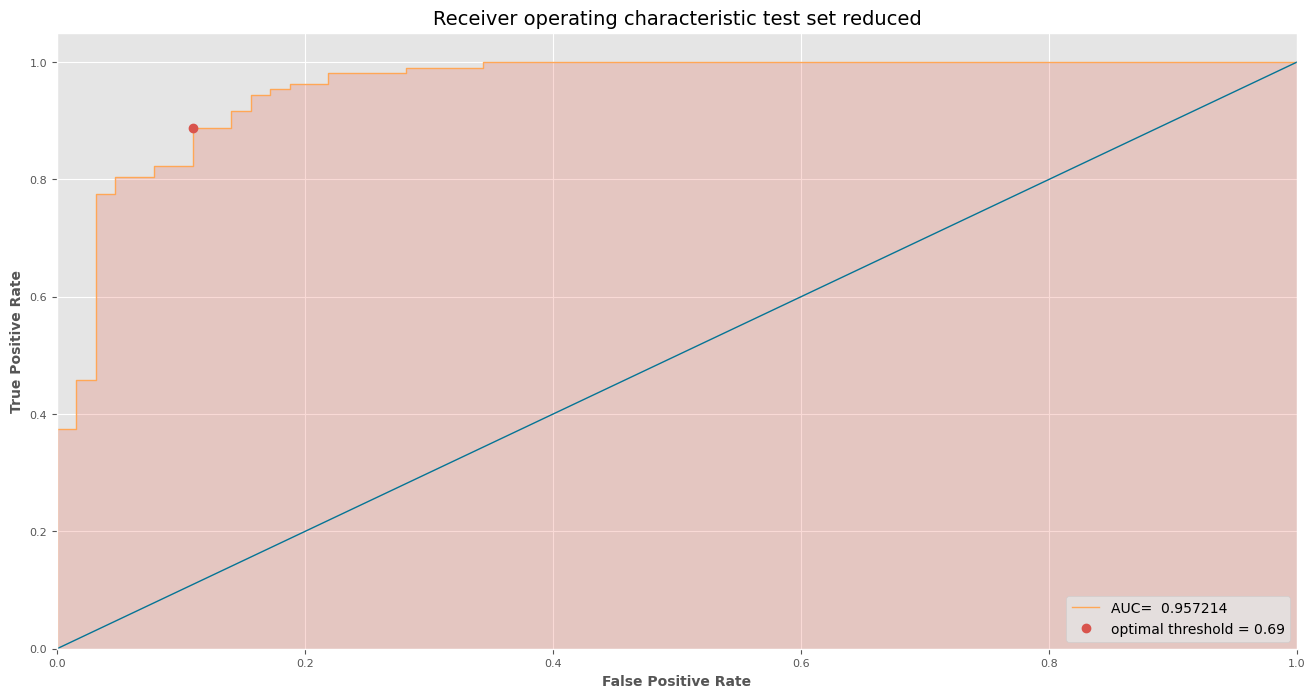

In [275]:
fpr, tpr, thresholds = roc_curve(t_test, p_test_reduced[:,1], pos_label=1)
distances = np.array(list(zip(np.sqrt((fpr - 0)**2 + (tpr - 1)**2), fpr, tpr, thresholds)))
distances = distances[distances[:,0].argsort()]
optimal_threshold_tsr = distances[0,3]
plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, color=colors[0], linewidth=1,label=f'AUC= {auc(fpr, tpr): 0.6f}')
plt.fill_between(fpr, 0, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color=colors[1], linewidth=1)
plt.plot(distances[0,1], distances[0,2], 'o', color=colors[2], label=f'optimal threshold = {optimal_threshold_tsr:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'True Positive Rate')
plt.xlabel(r'False Positive Rate')
plt.title('Receiver operating characteristic test set reduced', fontsize=14)
plt.legend(loc="lower right")
plt.show()

In [276]:
p_train_df = pd.DataFrame(p_train[:,1])
y_train_thrsh = p_train_df.applymap(lambda x: 1 if x>optimal_threshold_tr else 0)
p_test_df = pd.DataFrame(p_test[:,1])
y_test_thrsh = p_test_df.applymap(lambda x: 1 if x>optimal_threshold_ts else 0)
p_test_reduced_df = pd.DataFrame(p_test_reduced[:,1])
y_test_reduced_thrsh = p_test_reduced_df.applymap(lambda x: 1 if x>optimal_threshold_tsr else 0)

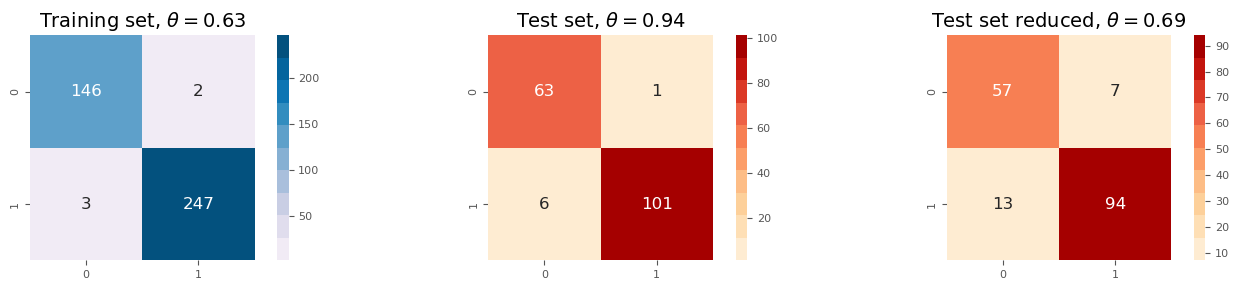

In [277]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
hm = sns.heatmap(confusion_matrix(t_train, y_train_thrsh),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("PuBu", 10))
plt.title(fr'Training set, $\theta={optimal_threshold_tr:.2f}$', fontsize=14)
plt.subplot(1,3,2)
hm = sns.heatmap(confusion_matrix(t_test, y_test_thrsh),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.title(fr'Test set, $\theta={optimal_threshold_ts:.2f}$', fontsize=14)
plt.subplot(1,3,3)
hm = sns.heatmap(confusion_matrix(t_test, y_test_reduced_thrsh),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.title(fr'Test set reduced, $\theta={optimal_threshold_tsr:.2f}$', fontsize=14)
plt.tight_layout()
plt.show()

In [278]:
print(fr'Training set')
print(classification_report(t_train, y_train))
print(fr'Training set, threshold={optimal_threshold_tr:.2f}')
print(classification_report(t_train, y_train_thrsh))
print(fr'Test set')
print(classification_report(t_test, y_test))
print(fr'Test set, threshold={optimal_threshold_ts:.2f}')
print(classification_report(t_test, y_test_thrsh))

Training set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       148
           1       0.99      1.00      0.99       250

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Training set, threshold=0.63
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       148
           1       0.99      0.99      0.99       250

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Test set
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96

## Precision recall curve

In [301]:
from sklearn.metrics import average_precision_score, auc

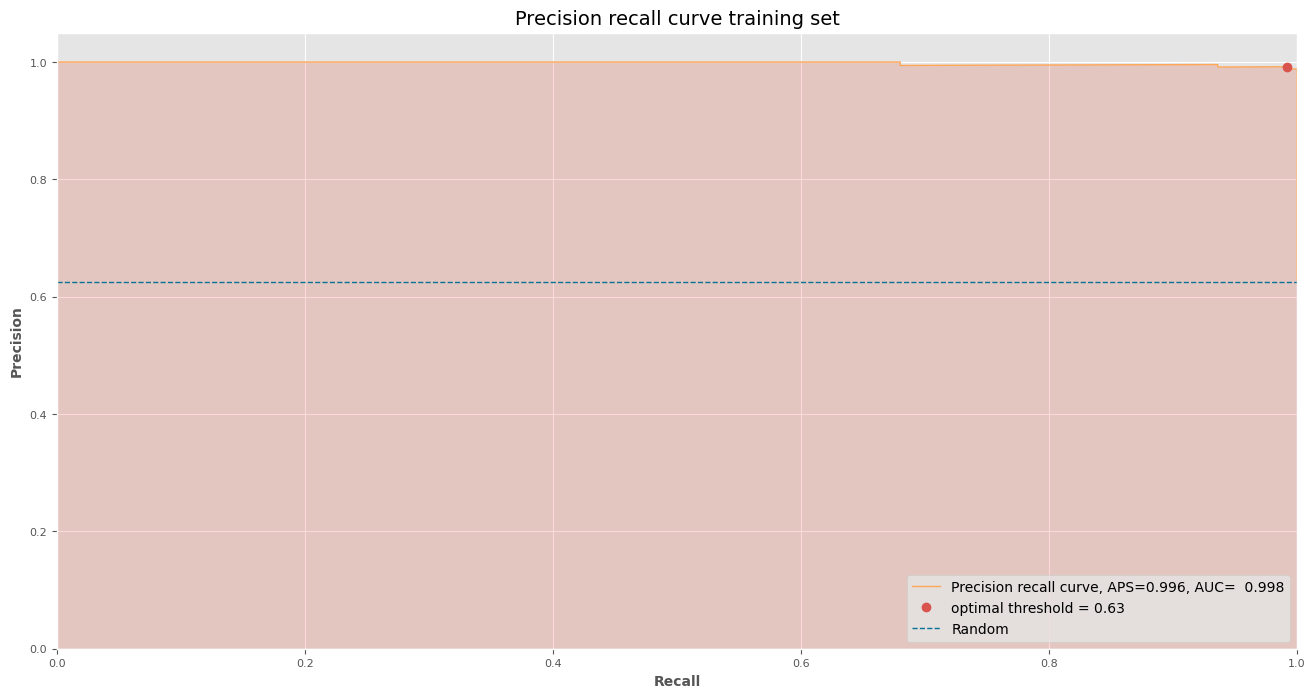

In [306]:
precision, recall, thresholds = precision_recall_curve(t_train, p_train[:,1], pos_label=1)
distances = np.array(list(zip(np.abs(precision - recall), precision, recall, thresholds)))
distances = distances[distances[:,0].argsort()]
optimal_threshold_ts = distances[0,3]
aps = average_precision_score(t_test, p_test[:,1])
rnd_precision = np.sum(t_test)/t_test.shape[0]


plt.figure(figsize=(16,8))
plt.plot(recall, precision, color=colors[0], linewidth=1,label=f'Precision recall curve, APS={aps:.3f}, AUC= {auc(recall, precision): 0.3f}')
plt.fill_between(recall, 0, precision, alpha=0.2)
plt.plot(distances[0,1], distances[0,2], 'o', color=colors[2], label=f'optimal threshold = {optimal_threshold_ts:.2f}')
plt.plot([0,1], [rnd_precision, rnd_precision], color=colors[1], linewidth=1, linestyle='dashed', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'Precision')
plt.xlabel(r'Recall')
plt.title(f'Precision recall curve training set', fontsize=14)
plt.legend(loc="lower right")
plt.show()

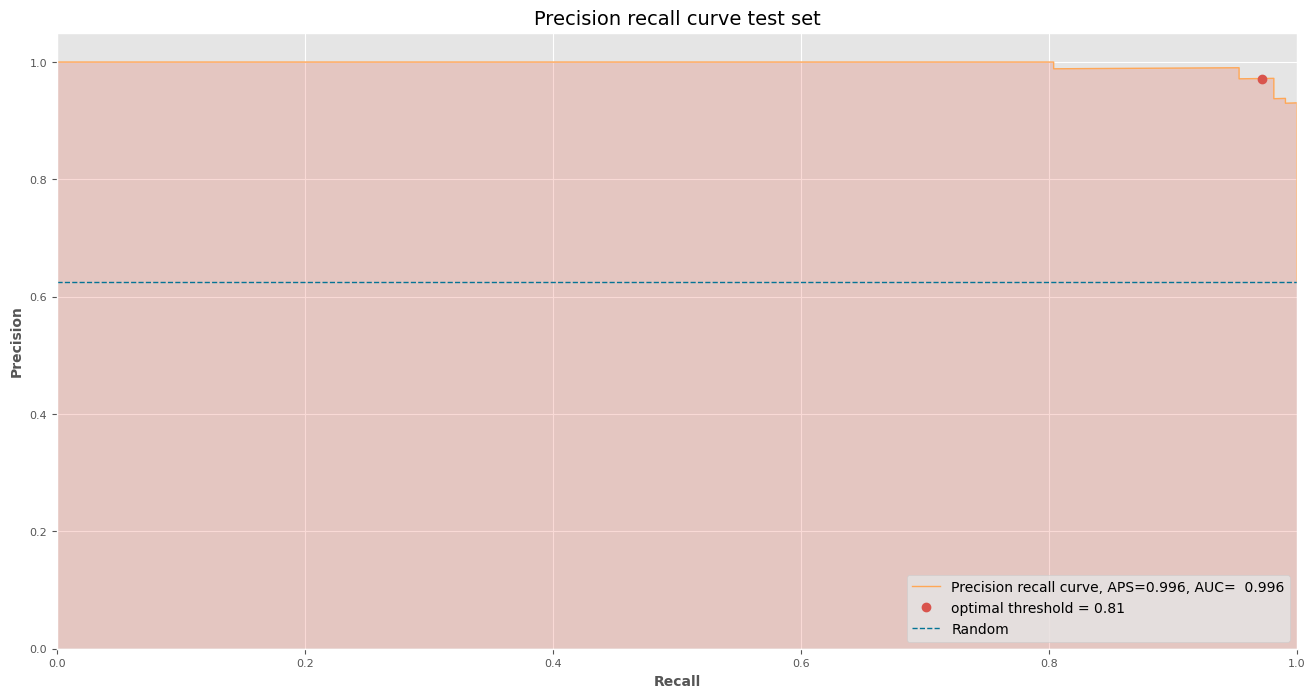

In [303]:
precision, recall, thresholds = precision_recall_curve(t_test, p_test[:,1], pos_label=1)
distances = np.array(list(zip(np.abs(precision - recall), precision, recall, thresholds)))
distances = distances[distances[:,0].argsort()]
optimal_threshold_ts = distances[0,3]
aps = average_precision_score(t_test, p_test[:,1])
rnd_precision = np.sum(t_test)/t_test.shape[0]


plt.figure(figsize=(16,8))
plt.plot(recall, precision, color=colors[0], linewidth=1,label=f'Precision recall curve, APS={aps:.3f}, AUC= {auc(recall, precision): 0.3f}')
plt.fill_between(recall, 0, precision, alpha=0.2)
plt.plot(distances[0,1], distances[0,2], 'o', color=colors[2], label=f'optimal threshold = {optimal_threshold_ts:.2f}')
plt.plot([0,1], [rnd_precision, rnd_precision], color=colors[1], linewidth=1, linestyle='dashed', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'Precision')
plt.xlabel(r'Recall')
plt.title(f'Precision recall curve test set', fontsize=14)
plt.legend(loc="lower right")
plt.show()

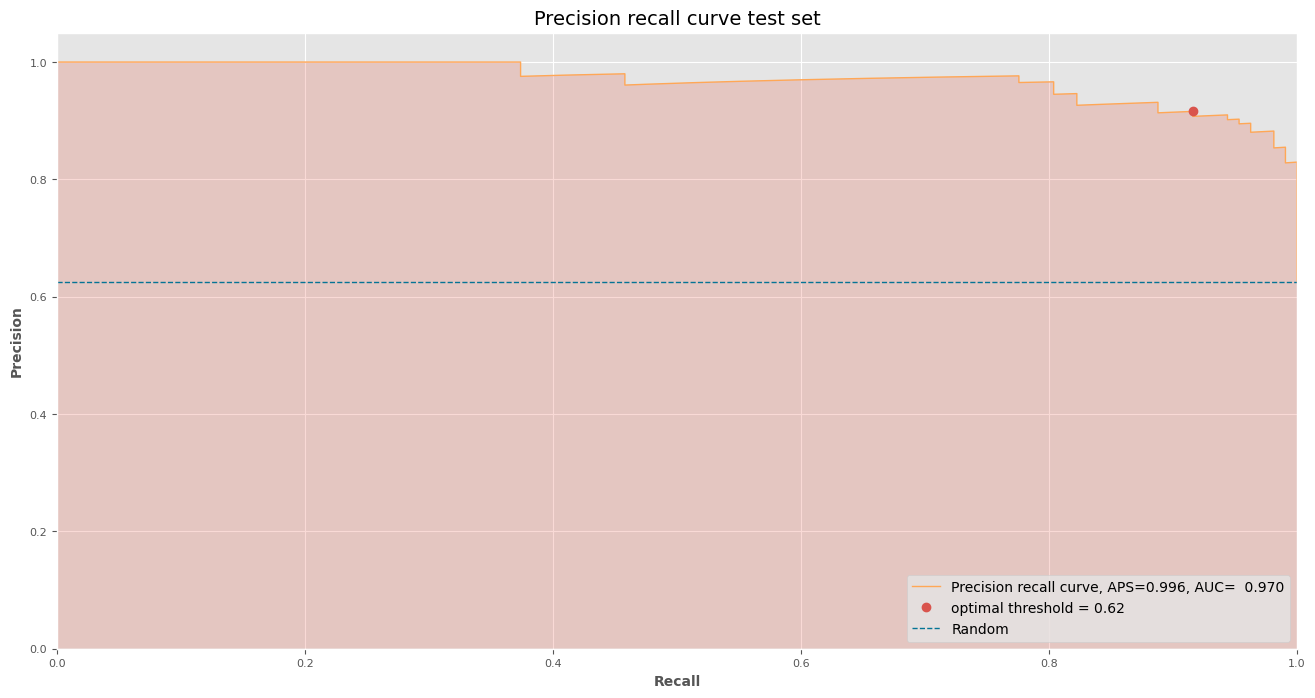

In [304]:
precision, recall, thresholds = precision_recall_curve(t_test, p_test_reduced[:,1], pos_label=1)
distances = np.array(list(zip(np.abs(precision - recall), precision, recall, thresholds)))
distances = distances[distances[:,0].argsort()]
optimal_threshold_ts = distances[0,3]
aps = average_precision_score(t_test, p_test[:,1])
rnd_precision = np.sum(t_test)/t_test.shape[0]


plt.figure(figsize=(16,8))
plt.plot(recall, precision, color=colors[0], linewidth=1,label=f'Precision recall curve, APS={aps:.3f}, AUC= {auc(recall, precision): 0.3f}')
plt.fill_between(recall, 0, precision, alpha=0.2)
plt.plot(distances[0,1], distances[0,2], 'o', color=colors[2], label=f'optimal threshold = {optimal_threshold_ts:.2f}')
plt.plot([0,1], [rnd_precision, rnd_precision], color=colors[1], linewidth=1, linestyle='dashed', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'Precision')
plt.xlabel(r'Recall')
plt.title(f'Precision recall curve test set', fontsize=14)
plt.legend(loc="lower right")
plt.show()

In [307]:
p_train_df = pd.DataFrame(p_train[:,1])
y_train_thrsh = p_train_df.applymap(lambda x: 1 if x>optimal_threshold_tr else 0)
p_test_df = pd.DataFrame(p_test[:,1])
y_test_thrsh = p_test_df.applymap(lambda x: 1 if x>optimal_threshold_ts else 0)
p_test_reduced_df = pd.DataFrame(p_test_reduced[:,1])
y_test_reduced_thrsh = p_test_reduced_df.applymap(lambda x: 1 if x>optimal_threshold_tsr else 0)

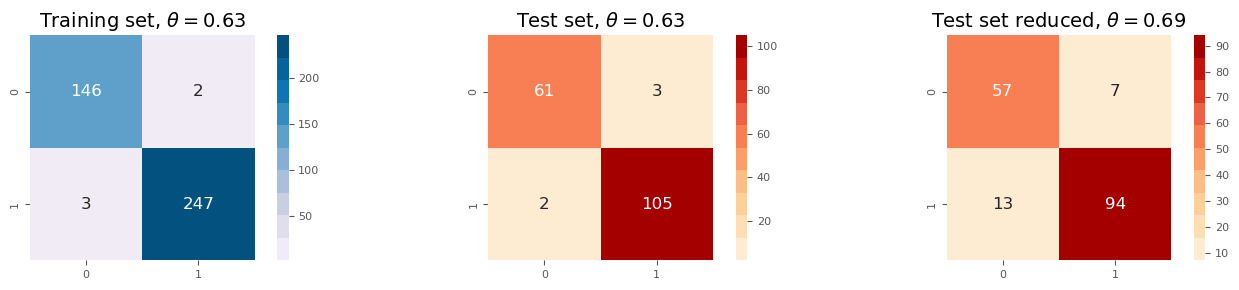

In [308]:

plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
hm = sns.heatmap(confusion_matrix(t_train, y_train_thrsh),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("PuBu", 10))
plt.title(fr'Training set, $\theta={optimal_threshold_tr:.2f}$', fontsize=14)
plt.subplot(1,3,2)
hm = sns.heatmap(confusion_matrix(t_test, y_test_thrsh),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.title(fr'Test set, $\theta={optimal_threshold_ts:.2f}$', fontsize=14)
plt.subplot(1,3,3)
hm = sns.heatmap(confusion_matrix(t_test, y_test_reduced_thrsh),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.title(fr'Test set reduced, $\theta={optimal_threshold_tsr:.2f}$', fontsize=14)
plt.tight_layout()
plt.show()

In [309]:
print(fr'Training set')
print(classification_report(t_train, y_train))
print(fr'Training set, threshold={optimal_threshold_tr:.2f}')
print(classification_report(t_train, y_train_thrsh))
print(fr'Test set')
print(classification_report(t_test, y_test))
print(fr'Test set, threshold={optimal_threshold_ts:.2f}')
print(classification_report(t_test, y_test_thrsh))

Training set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       148
           1       0.99      1.00      0.99       250

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Training set, threshold=0.63
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       148
           1       0.99      0.99      0.99       250

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Test set
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96

### Tackling overfitting via regularization

.....

<br>
<br>